In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
X, y = load_iris(return_X_y=True, as_frame=True)
columns = X.columns
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### PCA降维
- 以方差为度量， 可以降到任意维度，无监督

```python
PCA(
    n_component
)
```

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = 'Kaiti'

In [ ]:
pca3 = PCA(n_components=3).fit(X)
pca_data3 = pca3.transform(X)
pca2 = PCA(n_components=2).fit(X)
pca_data2 = pca2.transform(X)
pca_data3

In [12]:
pca = PCA(3).fit(X)
pca_data = pca.transform(X)

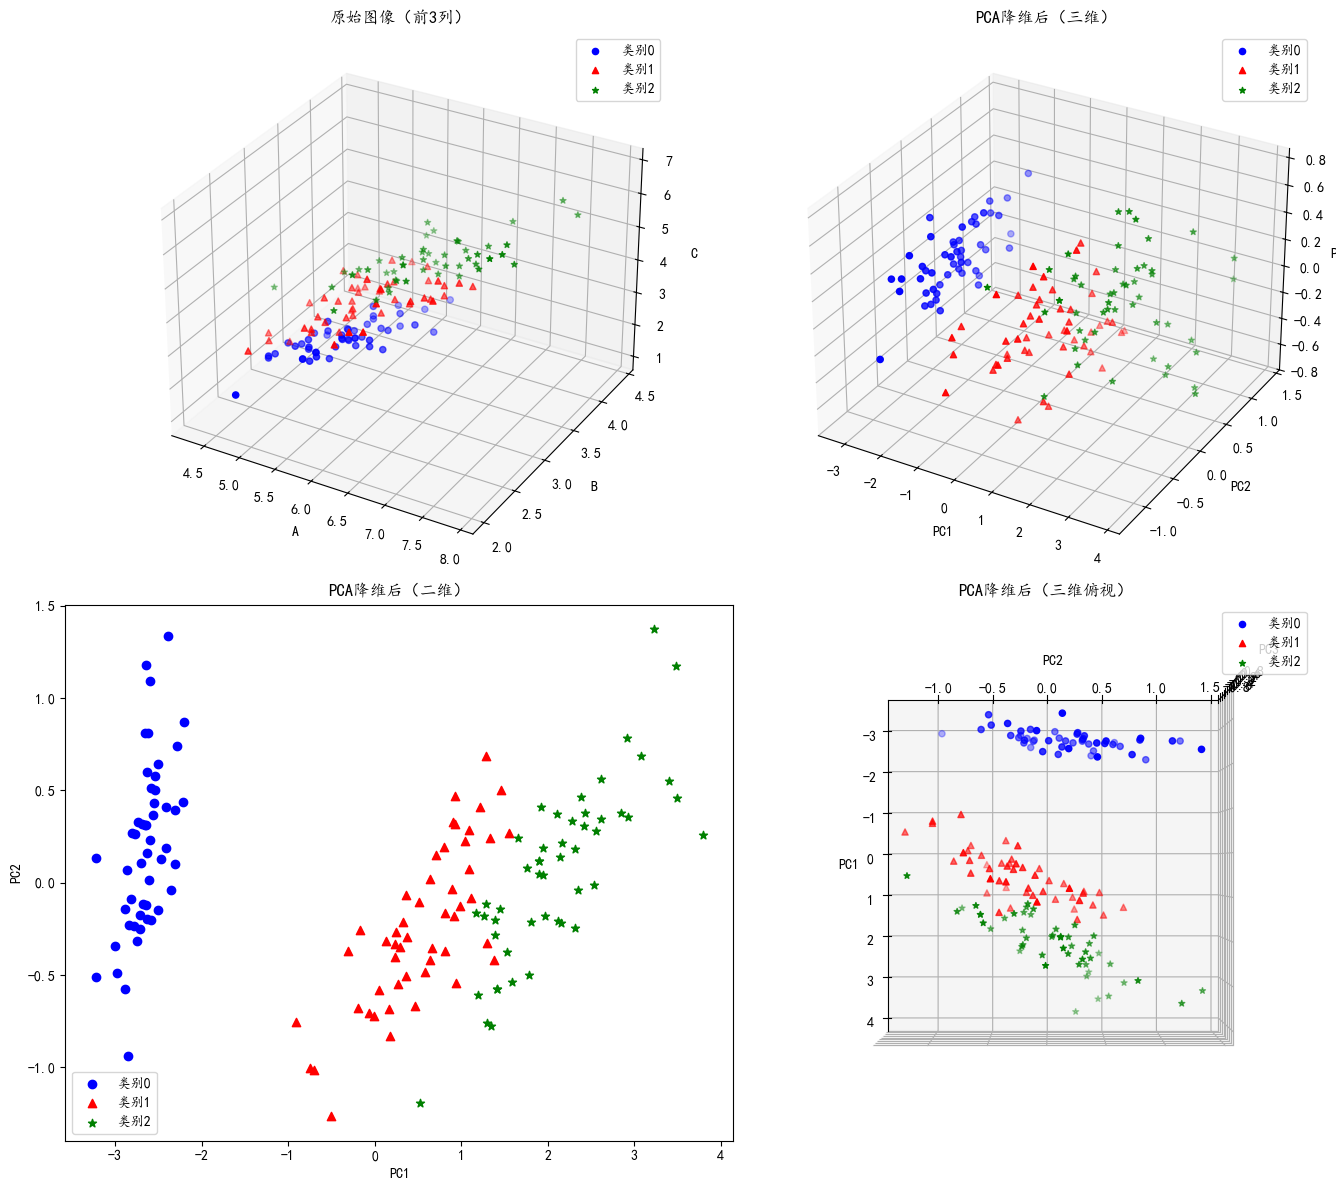

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# 字体设置（可选）
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['Kaiti']

# 加载数据
X, y = load_iris(return_X_y=True, as_frame=True)
columns = list("ABCD")
X.columns = columns

# PCA 降维
pca3 = PCA(n_components=3).fit(X)
X_pca3 = pca3.transform(X)

pca2 = PCA(n_components=2).fit(X)
X_pca2 = pca2.transform(X)

# 可视化
fig = plt.figure(figsize=(14, 12))

# -------------------- 原始图像（3D） --------------------
ax1 = fig.add_subplot(221, projection='3d')
for i, color, marker in zip([0, 1, 2], ['b', 'r', 'g'], ['o', '^', '*']):
    ax1.scatter(X[y == i][columns[0]], X[y == i][columns[1]], X[y == i][columns[2]],
                color=color, marker=marker, label=f'类别{i}')
ax1.set_title("原始图像（前3列）")
ax1.set_xlabel(columns[0])
ax1.set_ylabel(columns[1])
ax1.set_zlabel(columns[2])
ax1.legend()

# -------------------- PCA降维后 3D --------------------
ax2 = fig.add_subplot(222, projection='3d')
for i, color, marker in zip([0, 1, 2], ['b', 'r', 'g'], ['o', '^', '*']):
    ax2.scatter(X_pca3[y == i, 0], X_pca3[y == i, 1], X_pca3[y == i, 2],
                color=color, marker=marker, label=f'类别{i}')
ax2.set_title("PCA降维后（三维）")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax2.legend()

# -------------------- PCA降维后 2D --------------------
ax3 = fig.add_subplot(223)
for i, color, marker in zip([0, 1, 2], ['b', 'r', 'g'], ['o', '^', '*']):
    ax3.scatter(X_pca2[y == i, 0], X_pca2[y == i, 1],
                color=color, marker=marker, label=f'类别{i}')
ax3.set_title("PCA降维后（二维）")
ax3.set_xlabel("PC1")
ax3.set_ylabel("PC2")
ax3.legend()

# -------------------- PCA 俯视图（3D） --------------------
ax4 = fig.add_subplot(224, projection='3d')
for i, color, marker in zip([0, 1, 2], ['b', 'r', 'g'], ['o', '^', '*']):
    ax4.scatter(X_pca3[y == i, 0], X_pca3[y == i, 1], X_pca3[y == i, 2],
                color=color, marker=marker, label=f'类别{i}')
ax4.view_init(elev=90, azim=0)  # 俯视角
ax4.set_title("PCA降维后（三维俯视）")
ax4.set_xlabel("PC1")
ax4.set_ylabel("PC2")
ax4.set_zlabel("PC3")
ax4.legend()

plt.tight_layout()
plt.show()


#### LDA
```
既可以做分类，也可以做降维
选择分类效果最好的作为投影视角
以均值为度量标准
```

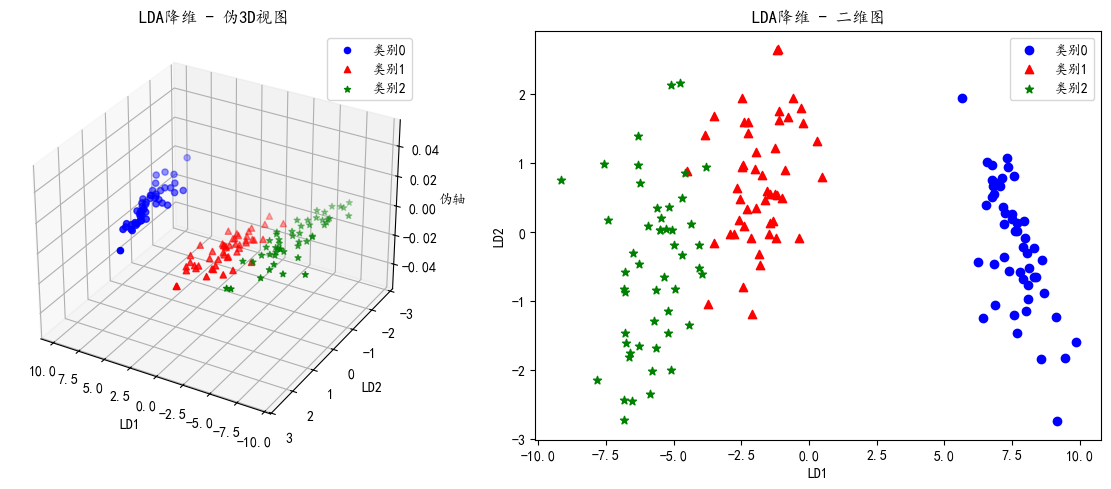

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

# 载入数据
X, y = load_iris(return_X_y=True, as_frame=True)
columns = list("ABCD")
X.columns = columns

# LDA降维
lda = LinearDiscriminantAnalysis()
lda_data = lda.fit_transform(X, y)  # shape: (n_samples, 2)

# 构造伪 3D 数据（补一列为 0）
import numpy as np
lda_data_3d = np.hstack([lda_data, np.zeros((lda_data.shape[0], 1))])

# 可视化
fig = plt.figure(figsize=(12, 5))

# -------------------- 左：LDA 伪3D --------------------
ax1 = fig.add_subplot(121, projection='3d')
for i, color, marker in zip([0, 1, 2], ['b', 'r', 'g'], ['o', '^', '*']):
    ax1.scatter(lda_data_3d[y == i, 0], lda_data_3d[y == i, 1], lda_data_3d[y == i, 2],
                color=color, marker=marker, label=f'类别{i}')
ax1.set_title("LDA降维 - 伪3D视图")
ax1.set_xlabel("LD1")
ax1.set_ylabel("LD2")
ax1.set_zlabel("伪轴")  # 实际为全0
ax1.view_init(elev=30, azim=120)
ax1.legend()

# -------------------- 右：LDA 2D --------------------
ax2 = fig.add_subplot(122)
for i, color, marker in zip([0, 1, 2], ['b', 'r', 'g'], ['o', '^', '*']):
    ax2.scatter(lda_data[y == i, 0], lda_data[y == i, 1],
                color=color, marker=marker, label=f'类别{i}')
ax2.set_title("LDA降维 - 二维图")
ax2.set_xlabel("LD1")
ax2.set_ylabel("LD2")
ax2.legend()

plt.tight_layout()
plt.show()


#### 流型学习